In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [148]:
def logit_loss(z):
    return np.log(1 + np.exp(-z)) / np.log(1 + np.exp(-1.))

def poly_loss(z):
    logit_part = logit_loss(z) / logit_loss(1.)
    poly_part = 1 / z
    return np.where(z > 1, poly_part, logit_part)

Text(5.2, 0.23, '$\\ell(z) \\sim 1/z$')

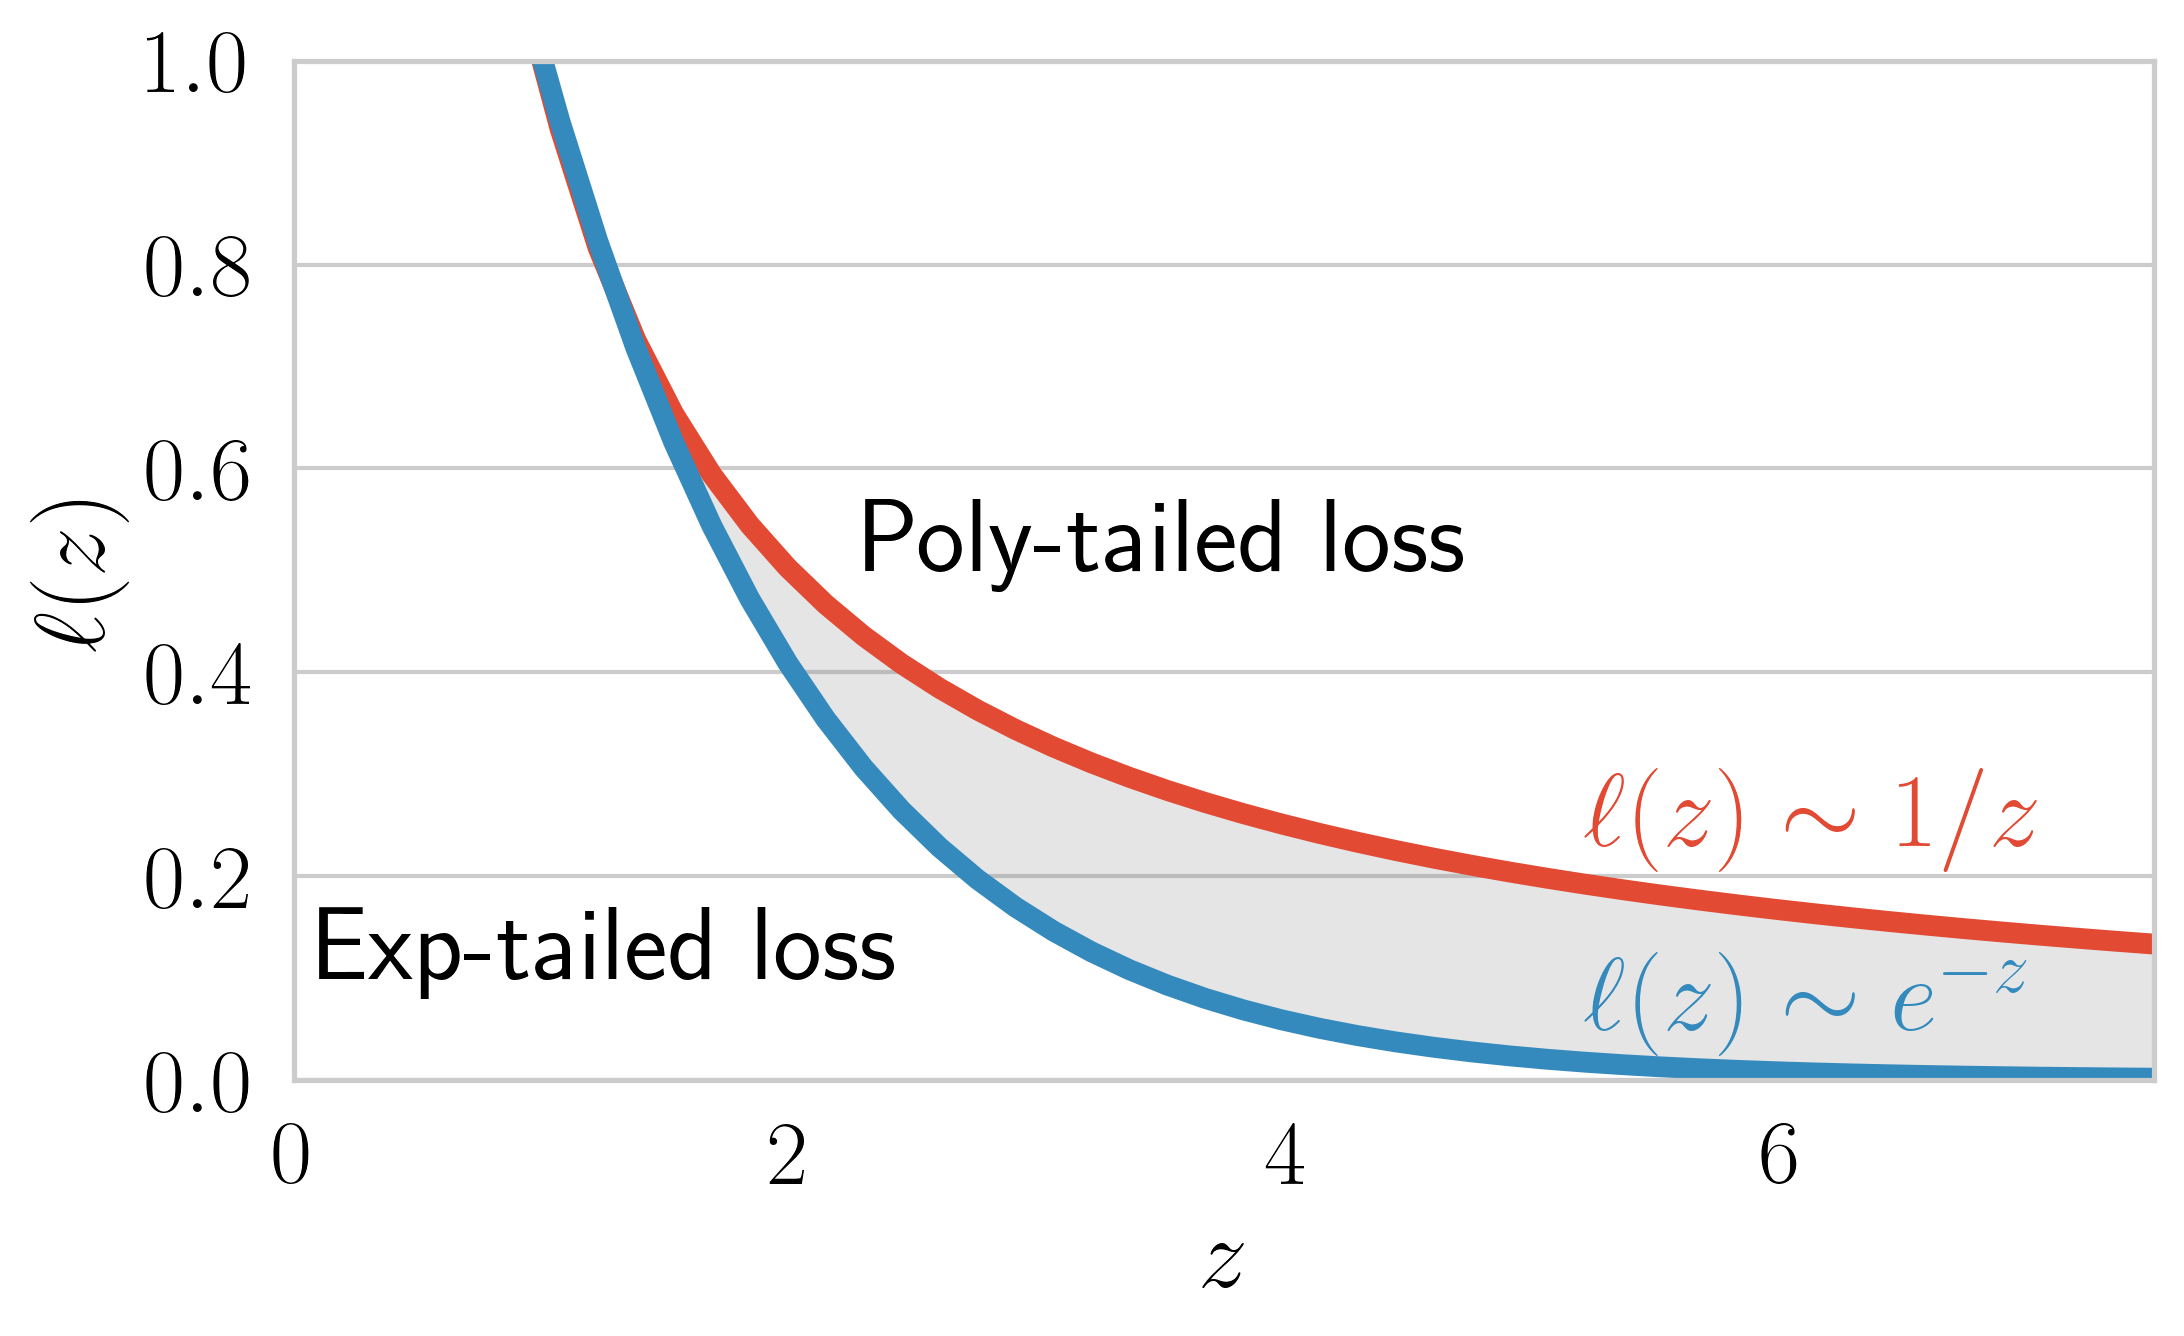

In [216]:
z = np.linspace(1e-6, 7.5)
zero = np.zeros(*z.shape)

RED = "#E24A33"
BLUE = "#348ABD"

fig, ax = plt.subplots(figsize=np.array([16, 9])/2, dpi=300)

ax.plot(z, poly_loss(z), c=RED, lw=5, label=r"$\ell_{{Poly}}$")
ax.plot(z, logit_loss(z), c =BLUE, lw=5, label=r"$\ell_{{Exp}}$")
ax.set(xlabel=r"$z$")
ax.set(ylabel=r"$\ell(z)$")
#ax.legend()
ax.grid(False)
ax.yaxis.grid()
ax.set(xlim=(0, 7.5))
ax.set(ylim=(0, 1.))

#ax.axvline(1.0, c="k", alpha=1.0, ls="--", lw=2.5)

gt1 = np.linspace(1, 10)
zero = np.zeros(*gt1.shape)
#ax.fill_between(gt1, poly_loss(gt1), zero, alpha=0.5, color=RED)
#ax.fill_between(gt1, logit_loss(gt1), zero, alpha=0.5, color=BLUE)
ax.fill_between(gt1, poly_loss(gt1), logit_loss(gt1), alpha=0.2, color="gray")

ax.text(2.3, 0.5, r"Poly-tailed loss", fontsize=25)
ax.text(0.1, 0.1, r"Exp-tailed loss", fontsize=25)

ax.text(5.2, 0.05, r"$\ell(z) \sim e^{-z}$", fontsize=25, color=BLUE)
ax.text(5.2, 0.23, r"$\ell(z) \sim 1/z$", fontsize=25, color=RED)

In [217]:
fig.savefig("tails.png", bbox_inches="tight", facecolor='white', transparent=False)